# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Loan Approval Prediction App  </div>




This application is designed to predict loan approval status based on user-provided applicant details and financial information. Using a machine learning model trained on historical loan data, the app evaluates key features like income, loan amount, credit history, and property area to make accurate predictions. The app includes advanced preprocessing steps, such as logarithmic transformations of financial features (Total Income, Monthly Instalment, and Income After Loan), to ensure robust and reliable outcomes.

The app is interactive, user-friendly, and leverages modern deployment techniques using Streamlit. Users can easily input data, view predictions, and understand the financial aspects influencing loan approval decisions.

## Key Features:

- Predicts loan approval status (Approved/Not Approved).
- Includes financial insights like income distribution and loan affordability.
- Handles feature engineering and data transformations dynamically based on user input.
- Built with Python, Streamlit, and a Logistic Regression machine learning model for scalability and efficiency.


## Key Columns Overview
**Loan_ID**: Unique identifier for each loan.

**Gender, Married, Dependents**: Personal details of the applicants.

**Education and Self_Employed**: Employment and education details.

**ApplicantIncome and CoapplicantIncome**: Income of the primary applicant and co-applicant.

**LoanAmount**: Requested loan amount (has missing values).

**Loan_Amount_Term**: Loan term in months.

**Credit_History**: Record of credit history (1.0 = good credit).

**Property_Area**: Type of property area (Urban, Rural, etc.).

**Loan_Status**: Loan approval status (Y = approved, N = not approved).


# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Importing Libraries  </div>



In [169]:
# Importing Libraries 

import pandas as pd 
import numpy as np 
import plotly.express as px
import seaborn as sns 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer


# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Data Overview and Preprocessing  </div>



In [171]:
# Load data set 
df = pd.read_csv("train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [173]:
# check duplicated value 
df.duplicated().sum()

0

In [174]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [176]:
# display 'nuique' , 'null' , 'persentage of null' and the 'types'

print('shape:')
print(df.shape)

tabela = pd.DataFrame({
    'nunique':df.nunique(),
    'Null':df.isna().sum(),
    'Null per%':df.isna().sum() *100/df.shape[0],
    'Types':df.dtypes.values
})
display(tabela)

shape:
(614, 13)


,nunique,Null,Null per%,Types
Loan_ID,614,0,0.000000,object
Gender,2,13,2.117264,object
Married,2,3,0.488599,object
Dependents,4,15,2.442997,object
Education,2,0,0.000000,object
Self_Employed,2,32,5.211726,object
ApplicantIncome,505,0,0.000000,int64
CoapplicantIncome,287,0,0.000000,float64
LoanAmount,203,22,3.583062,float64
Loan_Amount_Term,10,14,2.280130,float64


### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Feature Engineering  </div>



 **Create a new column 'Total_Income' as the sum of 'ApplicantIncome' and 'CoapplicantIncome'**

In [179]:
# Create a new column 'Total_Income' as the sum of 'ApplicantIncome' and 'CoapplicantIncome'
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

**Calculate monthly instalment based on LoanAmount (in thousands) and Loan_Amount_Term (in months)**

In [181]:
df["Monthly_Installement"] = round( (df["LoanAmount"] * 1000) / df["Loan_Amount_Term"] , 2 )

**Income_After_Loan can serve as a key predictor for determining loan approval, as it reflects the applicant's financial capability to meet other expenses while repaying the loan.**

In [183]:
df["Income_After_Loan"] = df["ApplicantIncome"] - df["Monthly_Installement"]

# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Analyzing the data by asking some key questions.  </div>



### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  How does Credit History affect loan approval rates?  </div>



In [186]:
# Convert 'Credit_History' to an object type
df['Credit_History'] = df['Credit_History'].astype('object')

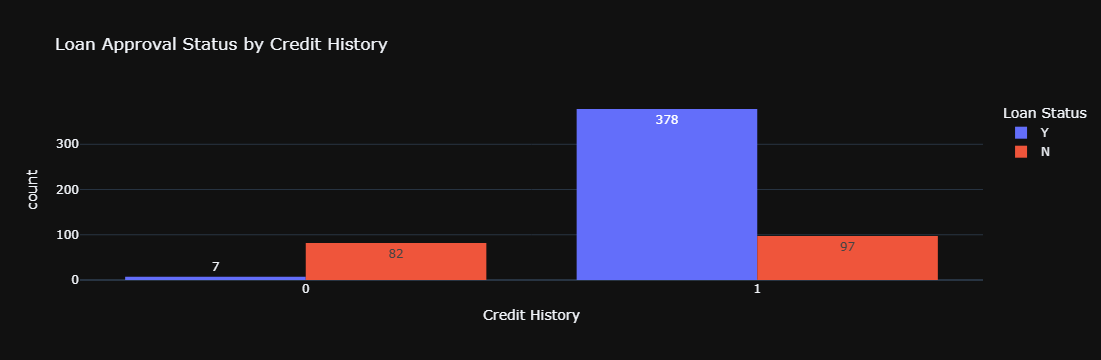

In [187]:
# Create a bar chart to show Loan_Status count for each Credit_History value
fig = px.histogram(df, 
             x='Credit_History', 
             color='Loan_Status', 
             barmode='group',
             template='plotly_dark',
             text_auto=True,
             title='Loan Approval Status by Credit History',
             labels={'Credit_History': 'Credit History', 'Loan_Status': 'Loan Status'})
fig.show()

## <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Does Applicant Income influence loan approval rates?  </div>



In [189]:
# Define income bins and labels
bins = [0, 2500, 5000, 10000, df['ApplicantIncome'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create an income category column based on ApplicantIncome
df['Income_Category'] = pd.cut(df['ApplicantIncome'], bins=bins, labels=labels, include_lowest=True)

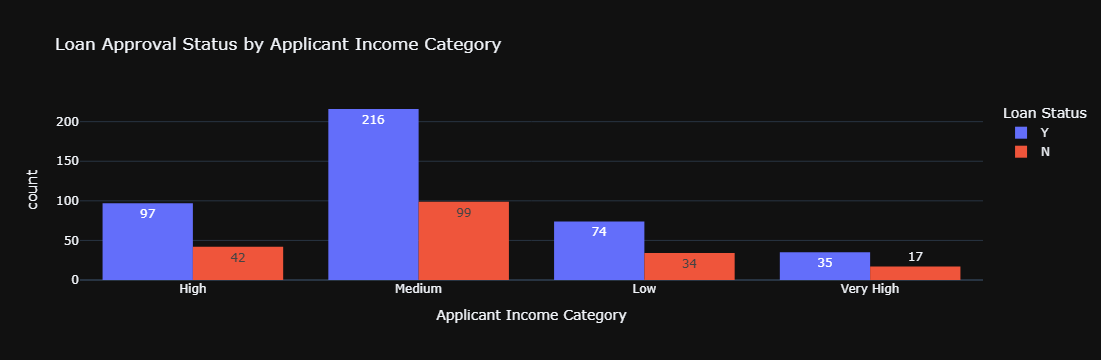

In [190]:
# Create a bar chart for Loan_Status by Income_Category
fig = px.histogram(df, 
             x='Income_Category', 
             color='Loan_Status', 
             barmode='group',
             text_auto=True,
             template='plotly_dark',
             title='Loan Approval Status by Applicant Income Category',
             labels={'Income_Category': 'Applicant Income Category', 'Loan_Status': 'Loan Status'})
fig.show()


## <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Does the Property Area (Urban, Semiurban, Rural) influence loan approval rates?  </div>



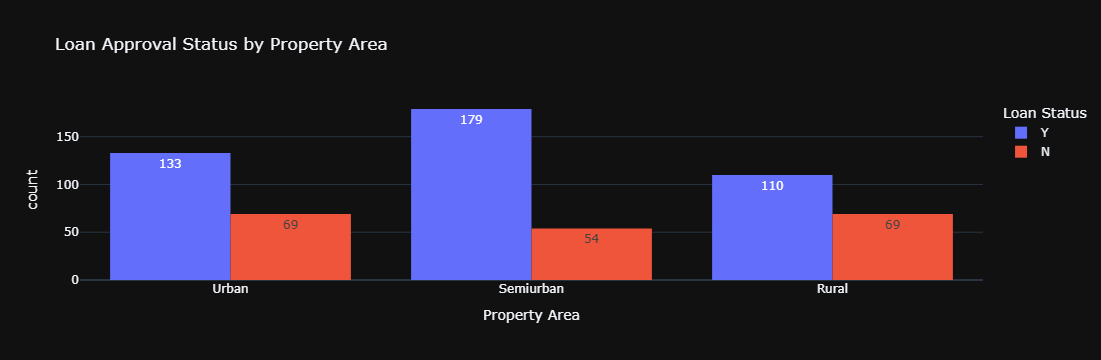

In [192]:
# Create a bar chart to show Loan_Status count for each Property_Area value
fig = px.histogram(df, 
             x='Property_Area', 
             color='Loan_Status', 
             barmode='group',
             template='plotly_dark',
             text_auto=True,
             title='Loan Approval Status by Property Area',
             labels={'Property_Area': 'Property Area', 'Loan_Status': 'Loan Status'})
fig.show()


## <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  what is the number of married males and females and aslo the number of not married ?  </div>



In [194]:
# Creates a column used for counting rows in the pivot table
df["Count"] = 1  

In [195]:
pivot = pd.pivot_table(
    data=df, 
    index="Gender",  
    columns="Married",  
    values="Count",  
    aggfunc="sum",  # Counts rows by summing the "Count" values
    fill_value=0    # Replaces missing values with 0 for better readability
)


In [196]:
# Display the pivot table for reference
print("Pivot Table of Gender and Married Status:")
pivot

Pivot Table of Gender and Married Status:


Married,No,Yes
Gender,,
Female,80,31
Male,130,357


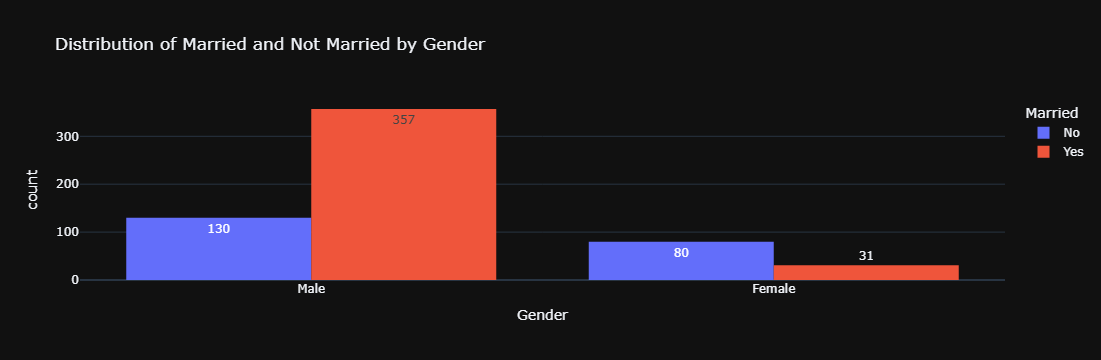

In [197]:
fig = px.histogram(
    data_frame=df,  
    x="Gender",  
    color="Married",  
    barmode="group",  
    text_auto=True,
    template='plotly_dark',
    title="Distribution of Married and Not Married by Gender",  
    labels={"Gender": "Gender", "Count": "Number of Individuals"}  
)
# Show the plot
fig.show()

## <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Does being Married affect loan approval rates?  </div>



In [199]:
# Creates a column used for counting rows in the pivot table
df["Count"] = 1  

In [200]:
pivot = pd.pivot_table(
    data=df, 
    index="Married",  
    columns="Loan_Status",  
    values="Count",  
    aggfunc="sum",  
    fill_value=0    
)

In [201]:
# Display the pivot table for reference
print("Pivot Table of :Loan_Status by Marital Status (Married)")
pivot

Pivot Table of :Loan_Status by Marital Status (Married)


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


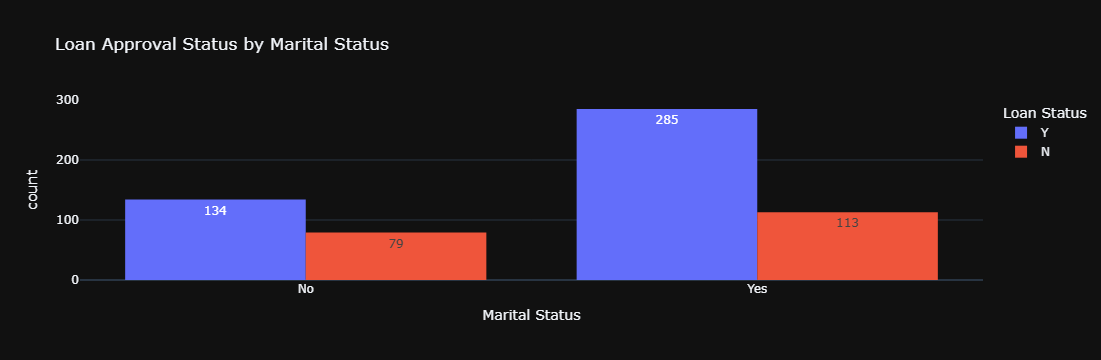

In [202]:
# Create a bar chart for Loan_Status by Marital Status (Married)
fig = px.histogram(
    data_frame=df,
    x='Married',
    color='Loan_Status', 
    barmode='group',
    text_auto=True,
    template='plotly_dark',          
    title='Loan Approval Status by Marital Status',
    labels={'Married': 'Marital Status', 'Loan_Status': 'Loan Status'}      
)                         
             
fig.show()

## <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Does the Education level (Graduate vs. Not Graduate) influence loan approvals?  </div>



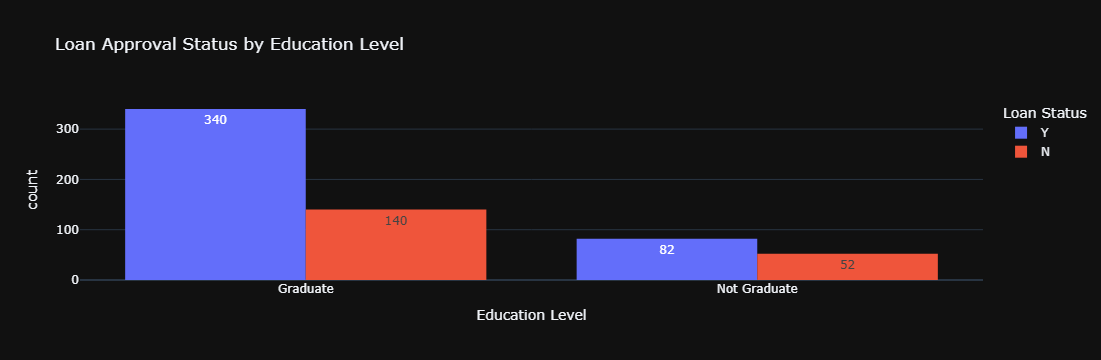

In [204]:
# Create a bar chart for Loan_Status by Education level
fig = px.histogram(df, 
             x='Education', 
             color='Loan_Status',
             barmode='group',
             template='plotly_dark',
             text_auto=True,
             title='Loan Approval Status by Education Level',
             labels={'Education': 'Education Level', 'Loan_Status': 'Loan Status'})
fig.show()


## <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Is there any releationship between the education and the employement ?  </div>



In [206]:
# Calculate self-employment percentages for Graduates
graduate_data = df[df["Education"] == "Graduate"]["Self_Employed"].value_counts(normalize=True) * 100
graduate_data = graduate_data.reset_index()
graduate_data.columns = ["Self_Employed", "Percentage"]
graduate_data["Education"] = "Graduate"

In [207]:
# Calculate self-employment percentages for Non-Graduates
non_graduate_data = df[df["Education"] == "Not Graduate"]["Self_Employed"].value_counts(normalize=True) * 100
non_graduate_data = non_graduate_data.reset_index()
non_graduate_data.columns = ["Self_Employed", "Percentage"]
non_graduate_data["Education"] = "Not Graduate"

In [208]:
# Combine both dataframes
education_employment_data = pd.concat([graduate_data, non_graduate_data])
education_employment_data

,Self_Employed,Percentage,Education
0,No,85.682819,Graduate
1,Yes,14.317181,Graduate
0,No,86.718750,Not Graduate
1,Yes,13.281250,Not Graduate


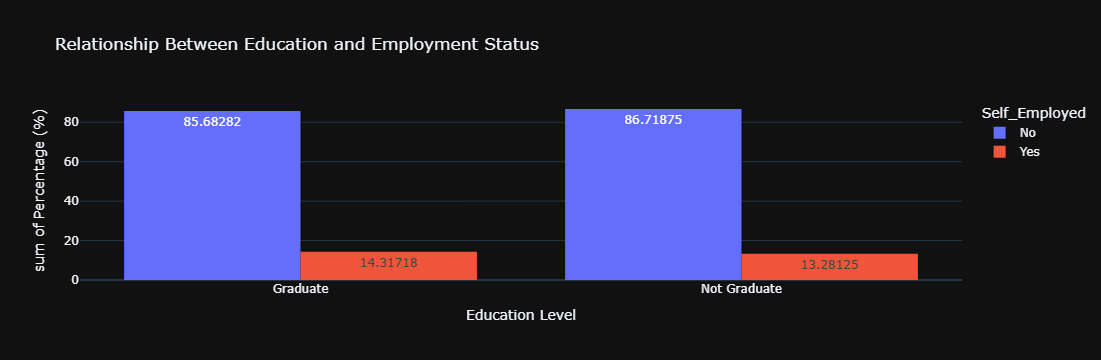

In [209]:
# Create grouped bar chart
fig = px.histogram(
    education_employment_data,
    x="Education",
    y="Percentage",
    color="Self_Employed",
    barmode="group",
    template='plotly_dark',
    text_auto=True,
    title="Relationship Between Education and Employment Status",
    labels={"Percentage": "Percentage (%)", "Education": "Education Level"}
)

# Show plot
fig.show()


### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Creates New Columns with the transformed values to reduce the impact of outliers and handle skewed data  </div>



**Why Use Logarithmic Transformation?**

**- Reduce Skewness:**

Many financial variables (like income and expenses) have positively skewed distributions. Applying a log transformation helps make these distributions closer to normal.

**- Handle Outliers:**

Log transformation compresses large values, reducing their influence on the model.

**- Model Performance:**

Models like linear regression or logistic regression often perform better with normalized data.

In [212]:
# List of numerical features to be transformed
Features = ['Total_Income', 'Monthly_Installement', 'Income_After_Loan']

In [213]:
# Apply logarithmic transformation to each feature in the list
for fet in Features:
    # Create a new column with the prefix "Log_" containing the log-transformed values
    df["Log_" + fet] = np.log(df[fet])

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log



# <div style="font-family: Trebuchet MS; background-color: #002699  ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Modeling  </div>



In [215]:
df.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Monthly_Installement', 'Income_After_Loan',
       'Income_Category', 'Count', 'Log_Total_Income',
       'Log_Monthly_Installement', 'Log_Income_After_Loan'],
      dtype='object')

In [216]:
# this columns are non-informative for model training

df.drop(columns=['Loan_ID','Income_Category','Count','ApplicantIncome','CoapplicantIncome','Total_Income','Monthly_Installement','Income_After_Loan'] , axis = 1 , inplace = True)

In [217]:
# Define features and target variable
x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status'].map({'Y': 1, 'N': 0}) 
# Map target to binary (Y=1, N=0)


In [218]:
# Identify categorical and numerical columns
Num_Columns = x.select_dtypes(include="number")
Cat_Columns = x.select_dtypes(include = "object_")

In [219]:
# Preprocessing for categorical and numerical data
Num_Steps = []
Num_Steps.append(("Num_Imputer" , KNNImputer()))
Num_Steps.append(("Scaler" , StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [220]:
Cat_Steps = []
Cat_Steps.append(("Cat_Imputer" , SimpleImputer(strategy="most_frequent")))

Cat_Steps.append(('Encoder' , OneHotEncoder(sparse_output=False, drop = "first")))
Cat_Pipeline = Pipeline(steps=Cat_Steps)

In [221]:
Transformer = ColumnTransformer(transformers=[("Num" , Num_Pipeline ,Num_Columns.columns) ,
                                              ("Cat" , Cat_Pipeline,Cat_Columns.columns)] ,
                                                 remainder="passthrough")

In [222]:
# Define the pipeline with preprocessing and classifier
steps = []
steps.append(("Preprocessing" , Transformer))
steps.append(("Model" , LogisticRegression()))
model_pipeline = Pipeline(steps = steps)

In [223]:
# Perform cross-validation and calculate accuracy scores
result = cross_validate(model_pipeline,x,y,cv = 5 , scoring="accuracy" ,return_train_score=True)

In [224]:
result["train_score"].mean()

0.8098546189127879

In [225]:
result["test_score"].mean()

0.8078368652538984

### <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Use Different Models  </div>



In [227]:
# Define models to test
models = [
    ("LR", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("DT", DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)),
    ("RF", RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)),
    ('SVM',SVC()),
    ('GNB',GaussianNB()),
    ('XGB',XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, reg_alpha=0.1, reg_lambda=1, eval_metric='logloss')),
    ('BC', BaggingClassifier())
]

In [228]:
# Evaluate each model with cross-validation
for name, model in models:
    # Create the pipeline for each model
    pipeline = Pipeline(steps=[
        ("preprocessor", Transformer),
        ("classifier", model)
    ])
    
    # Perform cross-validation
    result = cross_validate(pipeline, x, y, cv=5, scoring="accuracy", return_train_score=True)
    
    # Display results
    print(f"{name} Average Train accuracy Score: {result['train_score'].mean():.4f}")
    print(f"{name} Average Train accuracy Score: {result['test_score'].mean():.4f}\n")
    print("*" * 50)


LR Average Train accuracy Score: 0.8099
LR Average Train accuracy Score: 0.8078

**************************************************
KNN Average Train accuracy Score: 0.8058
KNN Average Train accuracy Score: 0.7263

**************************************************
DT Average Train accuracy Score: 0.8306
DT Average Train accuracy Score: 0.7899

**************************************************
RF Average Train accuracy Score: 0.8160
RF Average Train accuracy Score: 0.8062

**************************************************
SVM Average Train accuracy Score: 0.8241
SVM Average Train accuracy Score: 0.7948

**************************************************
GNB Average Train accuracy Score: 0.8111
GNB Average Train accuracy Score: 0.7964

**************************************************
XGB Average Train accuracy Score: 0.9581
XGB Average Train accuracy Score: 0.7736

**************************************************
BC Average Train accuracy Score: 0.9853
BC Average Train accuracy Sc

**The best model is:**

**- Logistic Regression (LR)** for simplicity, strong generalization, and high test accuracy.

### <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Grid Search  </div>



In [280]:
pipeline = Pipeline(steps=[
    ("preprocessor", Transformer),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [282]:
# Define the parameter grid for Logistic Regression within the pipeline
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],  # Add the step name 'classifier' as a prefix
    'classifier__penalty': ['l1', 'l2'],         # Specify penalties for LogisticRegression
    'classifier__solver': ['liblinear', 'saga']  # Compatible solvers for l1 and l2
}

In [284]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Evaluate using accuracy
    return_train_score=True  # Include train scores in results
)

In [286]:
# Fit GridSearchCV on the data
grid_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Num',
                                                                         Pipeline(steps=[('Num_Imputer',
                                                                                          KNNImputer()),
                                                                                         ('Scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LoanAmount', 'Loan_Amount_Term', 'Log_Total_Income',
       'Log_Monthly_Installement', 'Log_Income_After_Loan'],
      dtype='object')),
                                                                        ('Cat',
                                                                         Pipeline(steps=[('...
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [287]:
# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.809462881514061


In [288]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num',
                                                  Pipeline(steps=[('Num_Imputer',
                                                                   KNNImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanAmount', 'Loan_Amount_Term', 'Log_Total_Income',
       'Log_Monthly_Installement', 'Log_Income_After_Loan'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Cat_Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [292]:
grid_search.best_index_

4

In [294]:
grid_search.cv_results_["mean_train_score"][grid_search.best_index_]

0.8094472869372277

In [296]:
grid_search.cv_results_["mean_test_score"][grid_search.best_index_]

0.809462881514061

In [298]:
grid_search.best_params_

{'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [300]:
Final_Model = grid_search.best_estimator_

# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Save Model  </div>



In [306]:
import joblib

In [312]:
joblib.dump(Final_Model,"best_loan_approval_model.pkl")

['best_loan_approval_model.pkl']

# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Deploy the model  </div>



In [314]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import sklearn

# Load the trained model
model = joblib.load("best_loan_approval_model.pkl")

# Function to convert loan amount to thousands for the model
def convert_loan_amount(user_input_amount):
    return user_input_amount / 1000 

# Function to convert loan term from years to months
def convert_loan_term_in_years_to_months(user_input_years):
    return user_input_years * 12  

# Function to calculate log-transformed features
def calculate_log_features(applicant_income, coapplicant_income, loan_amount, loan_amount_term):
    try:
        total_income = applicant_income + coapplicant_income
        monthly_installement = (loan_amount * 1000) / loan_amount_term if loan_amount_term > 0 else 0
        income_after_loan = total_income - monthly_installement if total_income > monthly_installement else 0
        
        # Log transformations (handling non-positive values by adding 1)
        log_total_income = np.log(total_income + 1)
        log_monthly_installement = np.log(monthly_installement + 1)
        log_income_after_loan = np.log(income_after_loan + 1)
        
        return log_total_income, log_monthly_installement, log_income_after_loan
    except Exception as e:
        st.warning(f"Error in calculating log features: {str(e)}")
        return None, None, None

# Define function to make predictions based on user input
def get_prediction(input_data):
    try:
        # Perform prediction
        prediction = model.predict(input_data)
        # Display result
        st.text(f"The predicted loan approval status is: {'Approved' if prediction[0] == 1 else 'Not Approved'}")
    except Exception as e:
        # Handle any prediction errors
        st.text(f"Error in prediction: {str(e)}")

# Main function for the Streamlit app
def main():
    st.title("Loan Approval Prediction App")
    st.write("This app predicts whether a loan application will be approved or not based on applicant data.")

    # Get user inputs    
    gender = st.selectbox("Gender", ["Male", "Female"])
    married = st.selectbox("Married", ["Yes", "No"])
    dependents = st.selectbox("Dependents", ["0", "1", "2", "3+"])
    education = st.selectbox("Education", ["Graduate", "Not Graduate"])
    self_employed = st.selectbox("Self Employed", ["Yes", "No"])
    applicant_income = st.number_input("Applicant Income", min_value=0)
    coapplicant_income = st.number_input("Coapplicant Income", min_value=0)
    loan_amount_input = st.number_input("Loan Amount", min_value=0)
    loan_amount = convert_loan_amount(loan_amount_input)  
    loan_term_years = st.number_input("Loan Amount Term (in years)", min_value=0)
    loan_amount_term = convert_loan_term_in_years_to_months(loan_term_years)  
    credit_history = st.selectbox("Credit History", [1.0, 0.0])
    property_area = st.selectbox("Property Area", ["Urban", "Semiurban", "Rural"])

    # Calculate log-transformed features
    log_total_income, log_monthly_installement, log_income_after_loan = calculate_log_features(
        applicant_income, coapplicant_income, loan_amount, loan_amount_term
    )

    # Check if all log features were calculated successfully
    if None in [log_total_income, log_monthly_installement, log_income_after_loan]:
        st.warning("Cannot proceed with prediction due to missing log-transformed features.")
        return

    # Prepare input data
    input_data = pd.DataFrame({
        "Gender": [gender],
        "Married": [married],
        "Dependents": [dependents],
        "Education": [education],
        "Self_Employed": [self_employed],
        "LoanAmount": [loan_amount],
        "Loan_Amount_Term": [loan_amount_term],
        "Credit_History": [credit_history],
        "Property_Area": [property_area],
        "Log_Total_Income": [log_total_income],
        "Log_Monthly_Installement": [log_monthly_installement],
        "Log_Income_After_Loan": [log_income_after_loan]
    })

    # Button to make a prediction
    if st.button("Predict"):
        get_prediction(input_data)

# Run the app
main()


Overwriting app.py
